In [1]:
import pandas as pd
import numpy as np
import seaborn as sns  #update matplotlib,provide more useful function to draw pic
import matplotlib.pyplot as plt
from sklearn import preprocessing  #mathine learning
%matplotlib inline
#import the data
sample_data = pd.read_csv('train.csv')
sample_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,37,0,Travel_Rarely,Research & Development,1,4,Life Sciences,77,1,Male,...,3,80,1,7,2,4,7,5,0,7
1,54,0,Travel_Frequently,Research & Development,1,4,Life Sciences,1245,4,Female,...,1,80,1,33,2,1,5,4,1,4
2,34,1,Travel_Frequently,Research & Development,7,3,Life Sciences,147,1,Male,...,4,80,0,9,3,3,9,7,0,6
3,39,0,Travel_Rarely,Research & Development,1,1,Life Sciences,1026,4,Female,...,3,80,1,21,3,3,21,6,11,8
4,28,1,Travel_Frequently,Research & Development,1,3,Medical,1111,1,Male,...,1,80,2,1,2,3,1,0,0,0


In [2]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1100 non-null   int64 
 1   Attrition                 1100 non-null   int64 
 2   BusinessTravel            1100 non-null   object
 3   Department                1100 non-null   object
 4   DistanceFromHome          1100 non-null   int64 
 5   Education                 1100 non-null   int64 
 6   EducationField            1100 non-null   object
 7   EmployeeNumber            1100 non-null   int64 
 8   EnvironmentSatisfaction   1100 non-null   int64 
 9   Gender                    1100 non-null   object
 10  JobInvolvement            1100 non-null   int64 
 11  JobLevel                  1100 non-null   int64 
 12  JobRole                   1100 non-null   object
 13  JobSatisfaction           1100 non-null   int64 
 14  MaritalStatus           

In [3]:
sample_data.describe()  #basic data calculation 

,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.0,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,36.999091,0.161818,9.427273,2.922727,1028.157273,2.725455,2.730909,2.054545,2.732727,6483.620909,...,2.696364,80.0,0.788182,11.221818,2.807273,2.746364,7.011818,4.207273,2.226364,4.123636
std,9.037230,0.368451,8.196694,1.022242,598.915204,1.098053,0.706366,1.107805,1.109731,4715.293419,...,1.095356,0.0,0.843347,7.825548,1.291514,0.701121,6.223093,3.618115,3.313830,3.597996
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,2.000000,2.000000,504.250000,2.000000,2.000000,1.000000,2.000000,2924.500000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,7.000000,3.000000,1026.500000,3.000000,3.000000,2.000000,3.000000,4857.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,15.000000,4.000000,1556.500000,4.000000,3.000000,3.000000,4.000000,8354.500000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,29.000000,5.000000,2065.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [9]:
pos_data = sample_data[sample_data['Attrition']==1]
neg_data = sample_data[sample_data['Attrition']==0]
print('Positive sample number:{}'.format(len(pos_data)))
print('Negative sample number:{}'.format(len(neg_data)))
print('Proportion:{}'.format(len(neg_data)/len(sample_data)))
#Proportion of Positive sample & Negative sample

Positive sample number:178
Positive sample number:922
Proportion:0.8381818181818181


<AxesSubplot:xlabel='Attrition', ylabel='count'>

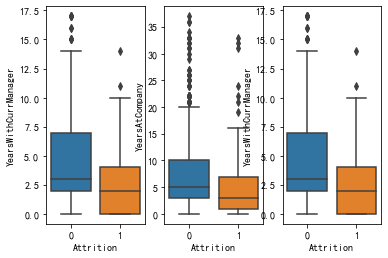

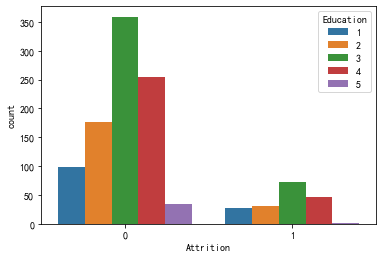

In [29]:
plt.figure()
#sns.countplot(x='Attrition',data=sample_data,hue ='Education')
plt.subplot(131) 
sns.boxplot(x='Attrition',data=sample_data,y ='YearsWithCurrManager') 
#JobInvolvement,YearsAtCompany,YearsWithCurrManager
plt.subplot(132) 
sns.boxplot(x='Attrition',data=sample_data,y ='YearsAtCompany') 
plt.subplot(133) 
sns.boxplot(x='Attrition',data=sample_data,y ='YearsWithCurrManager') 
plt.figure()
sns.countplot(x='Attrition',data=sample_data,hue ='Education')

D:\Software\Programs\Anaconda\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Software\Programs\Anaconda\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


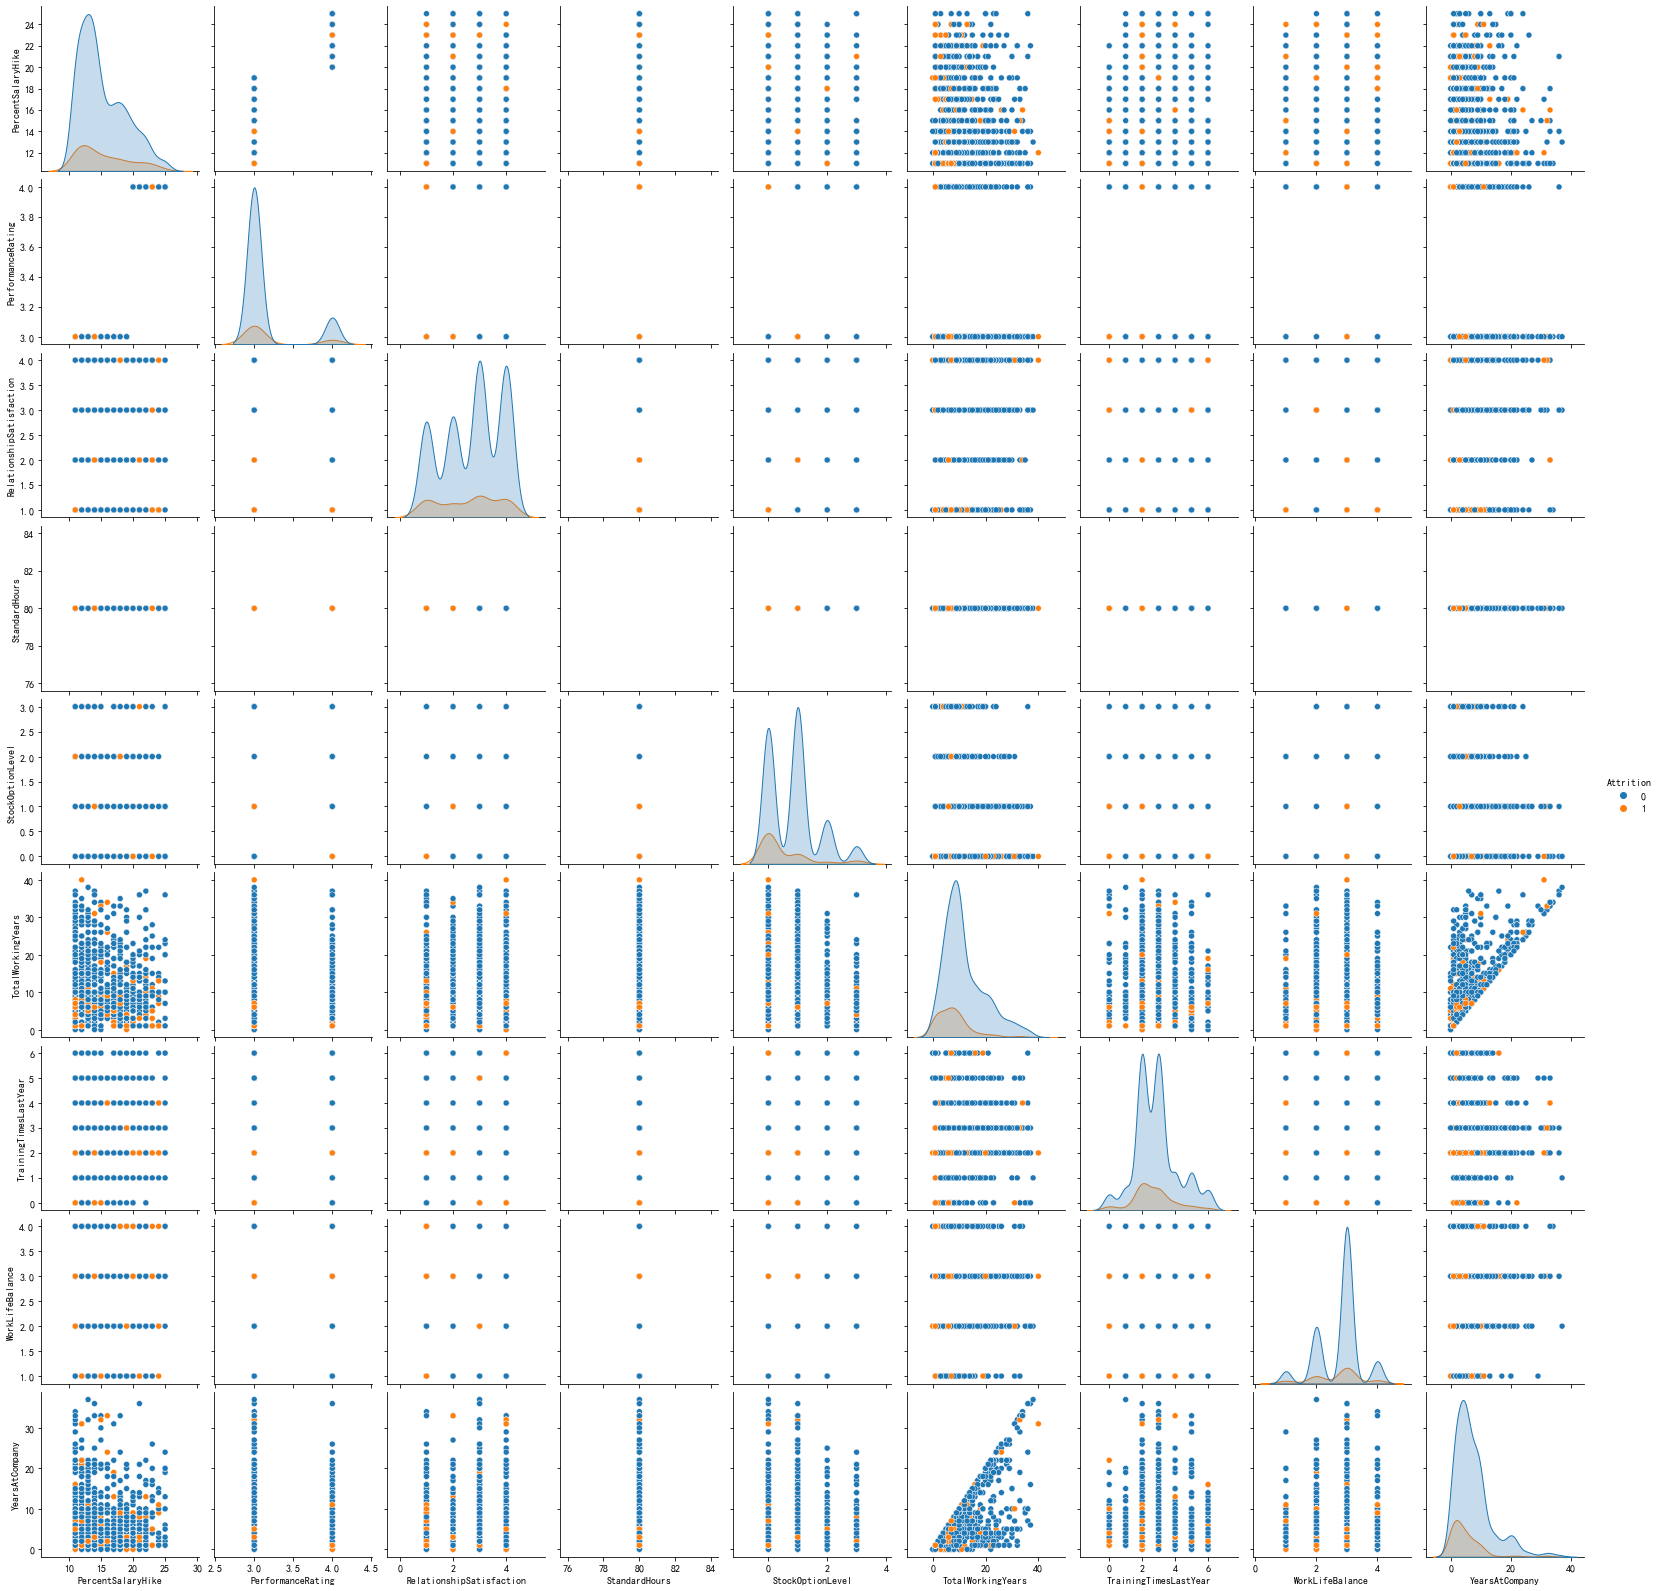

In [32]:
sns.pairplot(sample_data,hue ='Attrition',
             vars=['PercentSalaryHike','PerformanceRating',
                   'RelationshipSatisfaction','StandardHours',
                   'StockOptionLevel','TotalWorkingYears',
                   'TrainingTimesLastYear','WorkLifeBalance',
                   'YearsAtCompany']) 
#multi variable relationship 

In [35]:
#numerical data
num_cols = ['Age', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
           'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
target_col = ['Attrition']
total_cols = num_cols
used_data = sample_data[total_cols+target_col]
#print(used_data)

In [47]:
# Split training and testing data，80% for training，20% for testing

pos_data = used_data[used_data['Attrition'] == 1].reindex()
train_pos_data = pos_data.iloc[:int(len(pos_data) * 0.8)].copy()# proportion is the same in pos and neg data
test_pos_data = pos_data.iloc[int(len(pos_data) * 0.8) :].copy()

neg_data = used_data[used_data['Attrition'] == 0].reindex()
train_neg_data = neg_data.iloc[:int(len(neg_data) * 0.8)].copy()
test_neg_data = neg_data.iloc[int(len(neg_data) * 0.8) :].copy()

train_data = pd.concat([train_pos_data, train_neg_data])
test_data = pd.concat([test_pos_data, test_neg_data])
print(len(train_data))

879


In [48]:
# train_feats = train_data[num_cols].values
# train_target = train_data[target_col].values

# test_feats = test_data[num_cols].values
# test_target = test_data[target_col].values
# print(train_feats.shape)
# Integrate all features
train_feats = train_data[num_cols].values
train_targets = train_data[target_col].values

test_feats = test_data[num_cols].values
test_targets = test_data[target_col].values

print('Training data：', train_feats.shape)
print('Testing data：', test_feats.shape)

Training data： (879, 10)
Testing data： (221, 10)


In [50]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_feats,train_targets)

D:\Software\Programs\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\Software\Programs\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [52]:
from sklearn import metrics
test  = lr.predict(test_feats)
print(metrics.accuracy_score(test_targets,test))

0.8371040723981901
